In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from netCDF4 import num2date,date2num,Dataset
import scipy,matplotlib
import pyart
import time
import copy
%matplotlib inline

## Changes from test_proclp_grid_nexrad_2
This is copied from test_proclp_grid_nexrad_2 to do further tests to ensure that the LP processing is doing a good job and also maybe maybe maybe to compare to other methods of processing KDP. 

Specifically, I would like to address certain obvious defects observed in the KDP processing. We can maybe do that with pyart.graph.RadarDisplay(xsect).

In [30]:
#filenm  = 'KVNX20110520_102747_V06'
#filenm = 'KVNX20110520_103207_V06'
#filenm = '/mnt/raid/mvanlier/nexrad_khgx/20130608/KHGX20130608_150236_V06'
filenm = '/mnt/raid/mvanlier/nexrad_khgx/20130608/KHGX20130608_165255_V06'
#filenm = '/mnt/raid/mvanlier/nexrad_khgx/20130608/KHGX20130608_193925_V06'
radarob = pyart.io.read_nexrad_archive(filenm)
#radarob = pyart.io.nexrad_archive.read_nexrad_new(filenm)     #..For environment nexrad_new1

In [67]:
#coh_pwr = copy.deepcopy(radarnew.fields['differential_phase'])
coh_pwr = copy.deepcopy(radarob.fields['differential_phase'])
#coh_pwr = copy.deepcopy(radarob.fields['PHI'])
coh_pwr['data'] = coh_pwr['data']*0.+1.
radarob.fields['norm_coherent_power'] = coh_pwr
#print radarob.fields

#phidp,kdp = pyart.correct.phase_proc_lp(radarnew,0.0,refl_field='reflectivity',
phidp,kdp = pyart.correct.phase_proc_lp(radarob,0.0,refl_field='reflectivity',
                                        ncp_field='norm_coherent_power',
                                        rhv_field='cross_correlation_ratio',
                                        phidp_field='differential_phase',
#                                        LP_solver='cylp_mp',proc=15,coef=0.98,      #...Test high
#                                        LP_solver='cylp_mp',proc=15,coef=0.5,      #...Test low ... BAD!
                                        LP_solver='cylp_mp',proc=15,coef=0.87,      #...Default
                                        low_z=30.,fzl=13000.)
#                                         LP_solver='cylp')
#phidp,kdp = pyart.correct.phase_proc_lp(radarob,0.0,refl_field='REF',
#            ncp_field='norm_coherent_power',rhv_field='RHO',phidp_field='PHI')
radarob.fields['phidp'] = phidp
radarob.fields['kdp']=kdp
#radarnew.fields['phidp'] = phidp
#radarnew.fields['kdp']=kdp

Calculating with 15 processes, 48 rays per chunk
Calculating with 15 processes, 48 rays per chunk
Calculating with 15 processes, 48 rays per chunk
Calculating with 15 processes, 48 rays per chunk
Calculating with 15 processes, 48 rays per chunk
Calculating with 15 processes, 48 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk


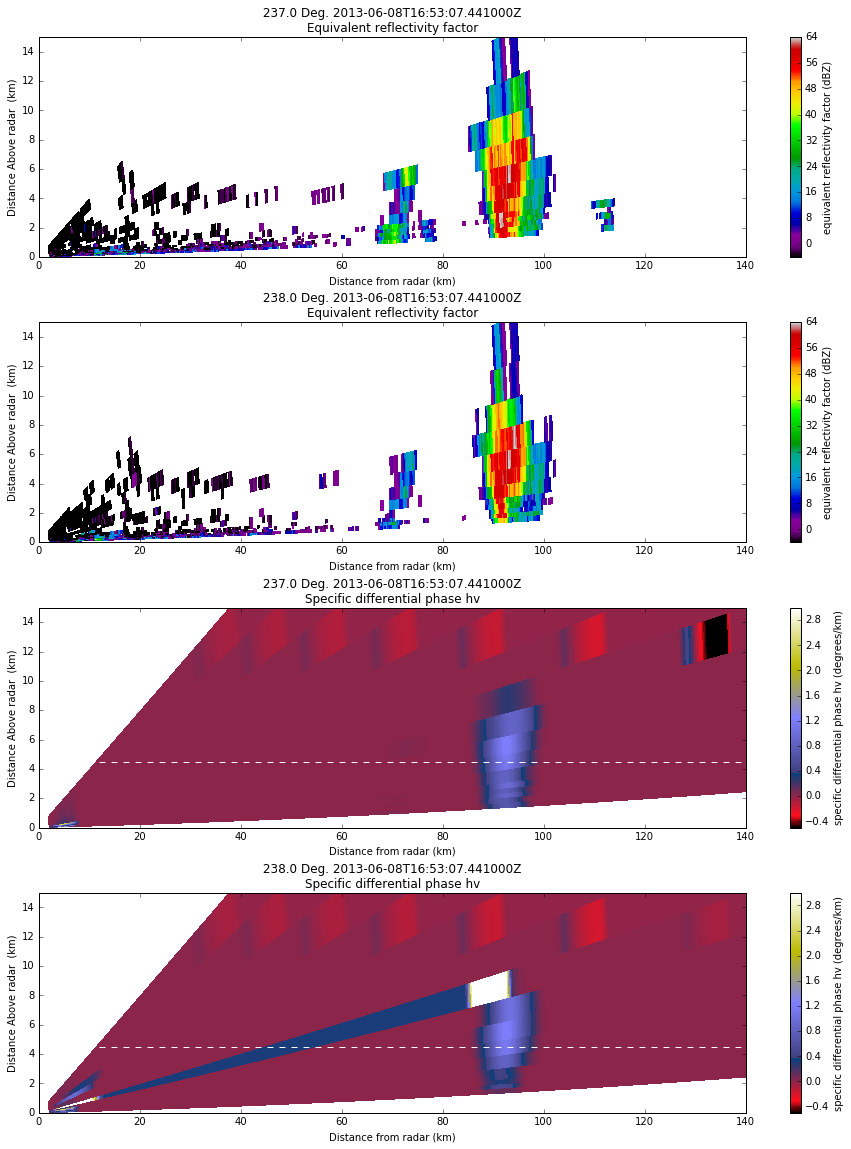

In [72]:
xsect = pyart.util.cross_section_ppi(radarob, [237, 238])

maxx = 140

display = pyart.graph.RadarDisplay(xsect)
fig = plt.figure(figsize=(13,16))
ax = fig.add_subplot(411)
display.plot('reflectivity', 0, vmin=-4, vmax=64.,cmap=cm.spectral)
ax.set_ylim(0.,15)
ax.set_xlim(0.,maxx)
ax = fig.add_subplot(412)
display.plot('reflectivity', 1, vmin=-4, vmax=64.,cmap=cm.spectral)
ax.set_ylim(0.,15)
ax.set_xlim(0.,maxx)

ax = fig.add_subplot(413)
display.plot('kdp', 0, vmin=-.5, vmax=3.,cmap=cm.gist_stern)
ax.plot([0.,maxx],[frz_lev,frz_lev],'w--')
ax.set_ylim(0.,15)
ax.set_xlim(0.,maxx)
ax = fig.add_subplot(414)
display.plot('kdp', 1, vmin=-.5, vmax=3.,cmap=cm.gist_stern)
ax.plot([0.,maxx],[frz_lev,frz_lev],'w--')
ax.set_ylim(0.,15)
ax.set_xlim(0.,maxx)

plt.tight_layout()
plt.show()

fig.savefig('kdp_proc_fail.png')

In [3]:
print radarob.fields
print radarob.fixed_angle

{'differential_phase': {'long_name': 'differential_phase_hv', 'valid_min': 0.0, '_FillValue': -9999.0, 'units': 'degrees', 'data': masked_array(data =
 [[13.398680686950684 14.45647144317627 17.62984275817871 ..., -- -- --]
 [18.687633514404297 28.207748413085938 16.572052001953125 ..., -- -- --]
 [20.80321502685547 28.207748413085938 29.265539169311523 ..., -- -- --]
 ..., 
 [22.21360206604004 15.514262199401855 21.861005783081055 ..., -- -- --]
 [92.38037872314453 40.90123748779297 26.797361373901367 ..., -- -- --]
 [25.386974334716797 29.265539169311523 22.91879653930664 ..., -- -- --]],
             mask =
 [[False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 ..., 
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]],
       fill_value = 1e+20)
, 'valid_max': 360.0, 'standard_name': 'differential_phase_hv', 'coordinates': 'e

In [4]:
nswp = radarob.nsweeps
swp_arr = range(nswp)
swp_arr.remove(1)
swp_arr.remove(3)
swp_arr.remove(5)
print swp_arr

[0, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [5]:
radarnew = radarob.extract_sweeps(swp_arr)
print radarnew.fixed_angle
#print radarob.info()

{'units': 'degrees', 'long_name': 'Target angle for sweep', 'standard_name': 'target_fixed_angle', 'data': array([  0.48339844,   0.87890625,   1.31835938,   1.80175781,
         2.41699219,   3.12011719,   3.99902344,   5.09765625,
         6.41601562,   7.99804688,  10.01953125,  12.48046875,
        15.60058594,  19.51171875], dtype=float32)}


In [4]:
#coh_pwr = copy.deepcopy(radarnew.fields['differential_phase'])
coh_pwr = copy.deepcopy(radarob.fields['differential_phase'])
#coh_pwr = copy.deepcopy(radarob.fields['PHI'])
coh_pwr['data'] = coh_pwr['data']*0.+1.
radarob.fields['norm_coherent_power'] = coh_pwr
#print radarob.fields

(-100, 150)

/home/mvanlier/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


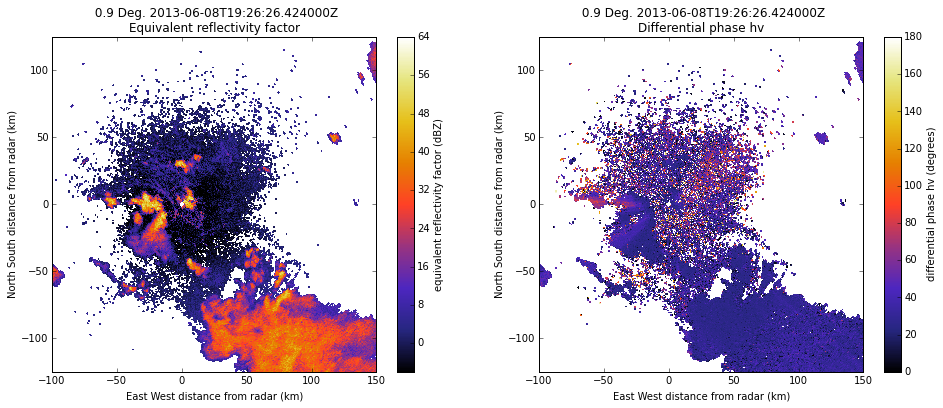

In [5]:
xmin=-100
xmax=150
ymin=-125
ymax=125
#my_display = pyart.graph.RadarDisplay(radarnew)
my_display = pyart.graph.RadarDisplay(radarob)
f = plt.figure(figsize=[16,6])
tilt = 2
plt.subplot(1,2,1)
my_display.plot_ppi('reflectivity',tilt,vmin=-6., vmax =64.,cmap=cm.CMRmap)
#my_display.plot_ppi('REF',tilt,vmin=-6., vmax =64.,title_flag=0)
plt.gca().set_ylim(ymin,ymax)
plt.gca().set_xlim(xmin, xmax)
plt.subplot(1,2,2)
my_display.plot_ppi('differential_phase',tilt,vmin=0.,vmax=180.,cmap=cm.CMRmap)
#my_display.plot_ppi('PHI',tilt,vmin=0.,vmax=180.,title_flag=0)
plt.gca().set_ylim(ymin,ymax)
plt.gca().set_xlim(xmin, xmax)

In [45]:
#phidp,kdp = pyart.correct.phase_proc_lp(radarnew,0.0,refl_field='reflectivity',
phidp,kdp = pyart.correct.phase_proc_lp(radarob,0.0,refl_field='reflectivity',
                                        ncp_field='norm_coherent_power',
                                        rhv_field='cross_correlation_ratio',
                                        phidp_field='differential_phase',
                                        LP_solver='cylp_mp',proc=15,coef=0.87,
                                        low_z=30.,fzl=10000.)
#                                         LP_solver='cylp')
#phidp,kdp = pyart.correct.phase_proc_lp(radarob,0.0,refl_field='REF',
#            ncp_field='norm_coherent_power',rhv_field='RHO',phidp_field='PHI')
radarob.fields['phidp'] = phidp
radarob.fields['kdp']=kdp
#radarnew.fields['phidp'] = phidp
#radarnew.fields['kdp']=kdp

Calculating with 15 processes, 48 rays per chunk
Calculating with 15 processes, 48 rays per chunk
Calculating with 15 processes, 48 rays per chunk
Calculating with 15 processes, 48 rays per chunk
Calculating with 15 processes, 48 rays per chunk
Calculating with 15 processes, 48 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk
Calculating with 15 processes, 24 rays per chunk


(-100, 150)

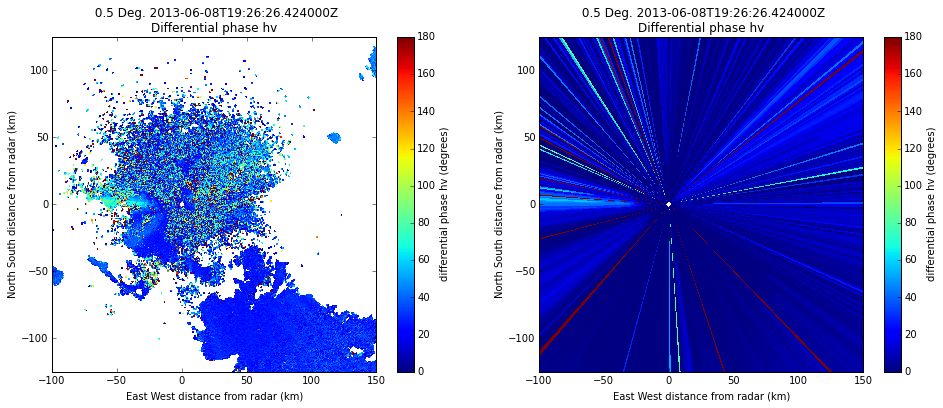

In [16]:
xmin=-100
xmax=150
ymin=-125
ymax=125
#my_display = pyart.graph.RadarDisplay(radarnew)
my_display = pyart.graph.RadarDisplay(radarob)
f = plt.figure(figsize=[16,6])
tilt = 0
plt.subplot(1,2,1)
my_display.plot_ppi('differential_phase',tilt,vmin=0., vmax =180.)
#my_display.plot_ppi('PHI',tilt,vmin=0., vmax =180.,title_flag=0)
plt.gca().set_ylim(ymin,ymax)
plt.gca().set_xlim(xmin, xmax)
plt.subplot(1,2,2)
my_display.plot_ppi('phidp',tilt,vmin=0.,vmax=180.)
plt.gca().set_ylim(ymin,ymax)
plt.gca().set_xlim(xmin, xmax)

(-100, 150)

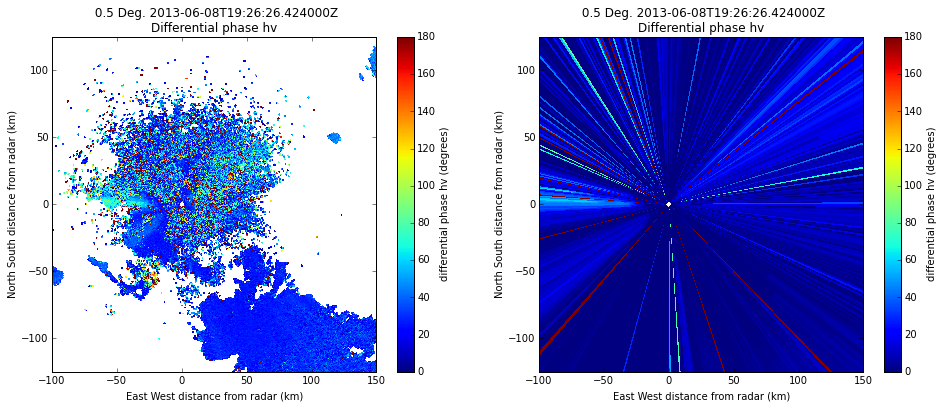

In [7]:
xmin=-100
xmax=150
ymin=-125
ymax=125
#my_display = pyart.graph.RadarDisplay(radarnew)
my_display = pyart.graph.RadarDisplay(radarob)
f = plt.figure(figsize=[16,6])
tilt = 0
plt.subplot(1,2,1)
my_display.plot_ppi('differential_phase',tilt,vmin=0., vmax =180.)
#my_display.plot_ppi('PHI',tilt,vmin=0., vmax =180.,title_flag=0)
plt.gca().set_ylim(ymin,ymax)
plt.gca().set_xlim(xmin, xmax)
plt.subplot(1,2,2)
my_display.plot_ppi('phidp',tilt,vmin=0.,vmax=180.)
plt.gca().set_ylim(ymin,ymax)
plt.gca().set_xlim(xmin, xmax)

(-100, 150)

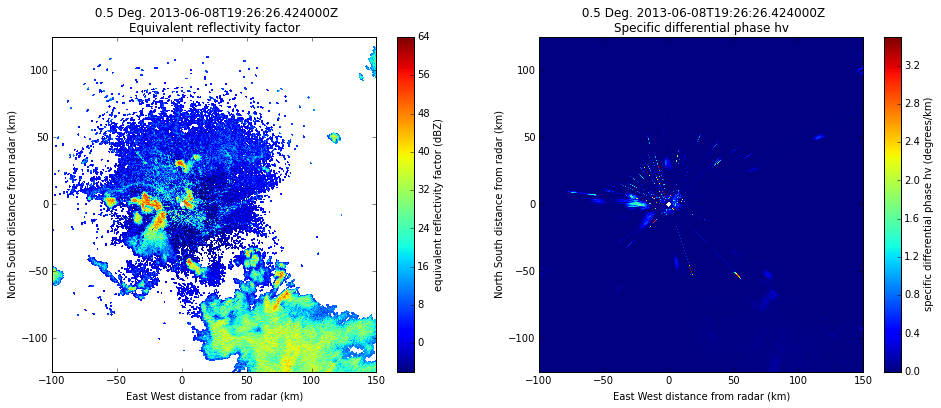

In [17]:
xmin=-100
xmax=150
ymin=-125
ymax=125
#my_display = pyart.graph.RadarDisplay(radarnew)
my_display = pyart.graph.RadarDisplay(radarob)
f = plt.figure(figsize=[16,6])
tilt = 0
plt.subplot(1,2,1)
my_display.plot_ppi('reflectivity',tilt,vmin=-6., vmax =64.)
#my_display.plot_ppi('REF',tilt,vmin=-6., vmax =64.,title_flag=0)
plt.gca().set_ylim(ymin,ymax)
plt.gca().set_xlim(xmin, xmax)
plt.subplot(1,2,2)
my_display.plot_ppi('kdp',tilt,vmin=0.0,vmax=3.5)
plt.gca().set_ylim(ymin,ymax)
plt.gca().set_xlim(xmin, xmax)

In [19]:
print 'test'

test


In [18]:
t1 = time.time()
grid_ref = pyart.map.grid_from_radars((radarob,),(35,400,400),
                                      ((0.,17500.),(-200000.,200000.),(-200000.,200000)),
                                      refl_field='reflectivity',roi_func='dist_beam',
                                      h_factor=.8,nb=1.2,bsp=.8)
print(time.time() - t1)

1603.85173702


In [46]:
t1 = time.time()
grid_ref = pyart.map.grid_from_radars((radarob,), grid_shape=(35,400,400),
        grid_limits=((0.,17500.),(-200000.,200000.), (-200000.,200000)),
        gridding_algo="map_gates_to_grid",
        weighting_function='BARNES',roi_func='dist_beam',
                                      h_factor=.8,nb=1.2,bsp=.8)
print(time.time() - t1)

78.9658300877


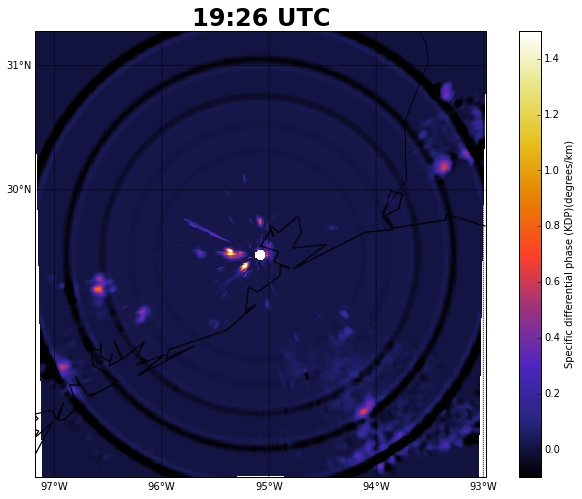

In [35]:
level = 5
zmin = 0.
zmax = 65.
kmin = -.1
kmax = 1.5
display = pyart.graph.GridMapDisplay(grid_ref)

fig = plt.figure(figsize=[12,8])

# ax = fig.add_subplot(111)
# ax.imshow(grid_ref.fields['kdp']['data'][1], origin='lower',vmin=kmin,vmax=kmax)
# plt.show()

#ax1 = fig.add_subplot(1,3,1)
#ax1 = fig.add_axes(panel1_axes)
display.plot_basemap()
#display.plot_grid('reflectivity',level=level,vmin=zmin,vmax=zmax,cmap=cm.CMRmap)
display.plot_grid('kdp',level=level,vmin=kmin,vmax=kmax,cmap=cm.CMRmap)
dts = num2date(grid_ref.axes['time']['data'], grid_ref.axes['time']['units'])
datestr = dts[0].strftime('%B %d, %Y')
timestr = dts[0].strftime('%H:%M UTC')
plt.title(timestr,fontsize=24,fontweight='bold')

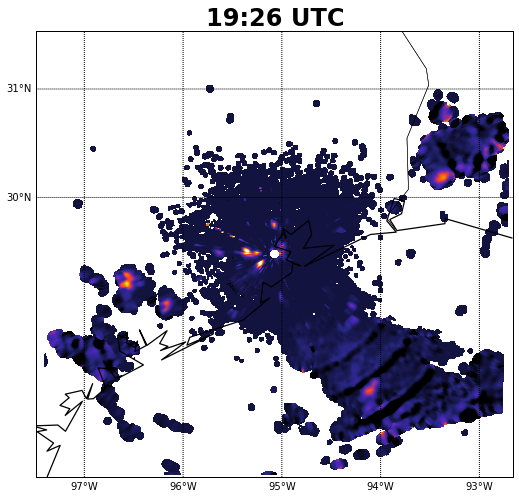

In [22]:
level = 5
zmin = 0.
zmax = 65.
kmin = -.1
kmax = 1.5
display = pyart.graph.GridMapDisplay(grid_ref)

fig = plt.figure(figsize=[12,8])

# ax = fig.add_subplot(111)
# ax.imshow(grid_ref.fields['kdp']['data'][1], origin='lower',vmin=kmin,vmax=kmax)
# plt.show()

#ax1 = fig.add_subplot(1,3,1)
#ax1 = fig.add_axes(panel1_axes)
display.plot_basemap()
#display.plot_grid('reflectivity',level=level,vmin=zmin,vmax=zmax,cmap=cm.CMRmap)
display.plot_grid('kdp',level=level,vmin=kmin,vmax=kmax,cmap=cm.CMRmap)
dts = num2date(grid_ref.axes['time']['data'], grid_ref.axes['time']['units'])
datestr = dts[0].strftime('%B %d, %Y')
timestr = dts[0].strftime('%H:%M UTC')
plt.title(timestr,fontsize=24,fontweight='bold')

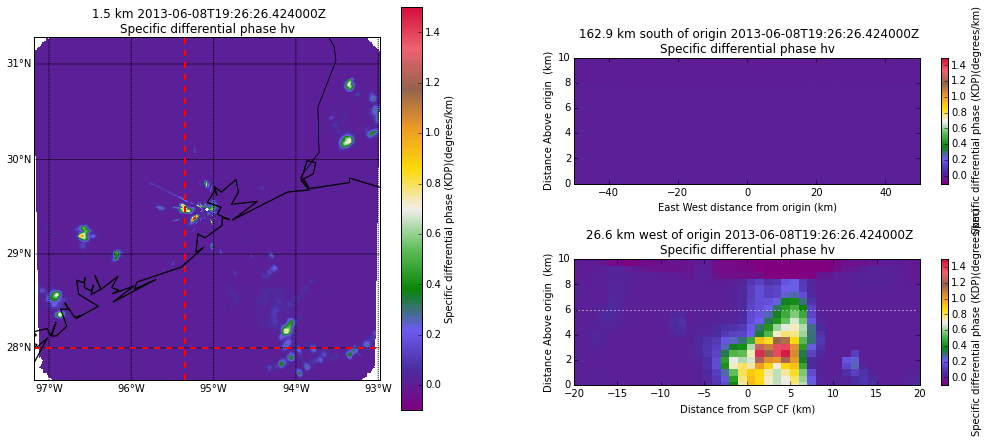

In [47]:
display = pyart.graph.GridMapDisplay(grid_ref)

fig = plt.figure(figsize=[15, 7])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# parameters
level = 3
vmin = -8
vmax = 64
lat = 28.0
lon = -95.35

# panel 1, basemap, radar reflectivity and NARR overlay
ax1 = fig.add_axes(map_panel_axes)
display.plot_basemap(lon_lines = np.arange(-100, -92, 1),lat_lines=np.arange(27,33,1) )
#display.plot_grid('reflectivity', level=level, vmin=vmin, vmax=vmax,
display.plot_grid('kdp', level=level, vmin=kmin,vmax=kmax,
                 cmap = pyart.graph.cm.RRate11)
display.plot_crosshairs(lon=lon, lat=lat)

# panel 2, longitude slice.
ax2 = fig.add_axes(x_cut_panel_axes)
#display.plot_longitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
display.plot_longitude_slice('kdp', lon=lon, lat=lat, vmin=kmin,vmax=kmax,
                            cmap = pyart.graph.cm.RRate11)
ax2.set_ylim([0,10])
ax2.set_xlim([-20,20])
ax2.plot([-20,20],[6.,6.],'w:')
ax2.set_xlabel('Distance from SGP CF (km)')

# panel 3, latitude slice
ax3 = fig.add_axes(y_cut_panel_axes)
ax3.set_ylim([0,10])
ax3.set_xlim([-50,50])
#display.plot_latitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
display.plot_latitude_slice('kdp', lon=lon, lat=lat, vmin=kmin,vmax=kmax,
    cmap = pyart.graph.cm.RRate11)


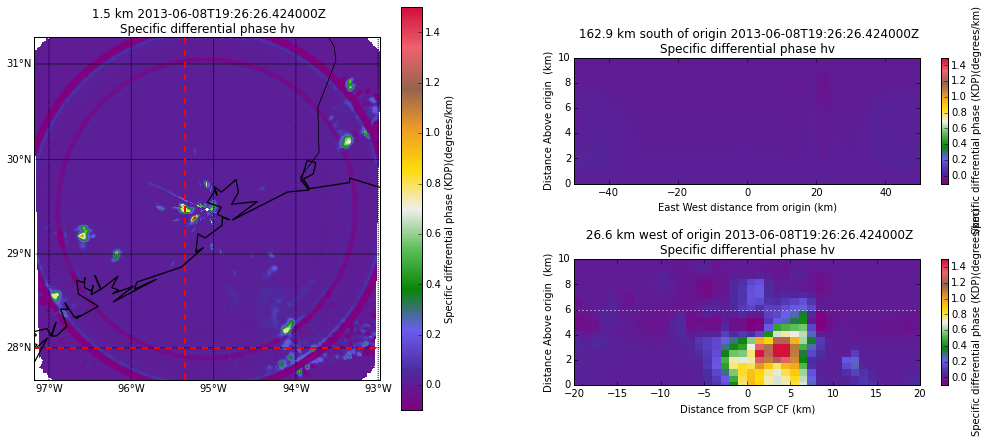

In [40]:
display = pyart.graph.GridMapDisplay(grid_ref)

fig = plt.figure(figsize=[15, 7])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# parameters
level = 3
vmin = -8
vmax = 64
lat = 28.0
lon = -95.35

# panel 1, basemap, radar reflectivity and NARR overlay
ax1 = fig.add_axes(map_panel_axes)
display.plot_basemap(lon_lines = np.arange(-100, -92, 1),lat_lines=np.arange(27,33,1) )
#display.plot_grid('reflectivity', level=level, vmin=vmin, vmax=vmax,
display.plot_grid('kdp', level=level, vmin=kmin,vmax=kmax,
                 cmap = pyart.graph.cm.RRate11)
display.plot_crosshairs(lon=lon, lat=lat)

# panel 2, longitude slice.
ax2 = fig.add_axes(x_cut_panel_axes)
#display.plot_longitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
display.plot_longitude_slice('kdp', lon=lon, lat=lat, vmin=kmin,vmax=kmax,
                            cmap = pyart.graph.cm.RRate11)
ax2.set_ylim([0,10])
ax2.set_xlim([-20,20])
ax2.plot([-20,20],[6.,6.],'w:')
ax2.set_xlabel('Distance from SGP CF (km)')

# panel 3, latitude slice
ax3 = fig.add_axes(y_cut_panel_axes)
ax3.set_ylim([0,10])
ax3.set_xlim([-50,50])
#display.plot_latitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
display.plot_latitude_slice('kdp', lon=lon, lat=lat, vmin=kmin,vmax=kmax,
    cmap = pyart.graph.cm.RRate11)


In [23]:
#pyart.io.write_grid('nexgridtest_distbeam_p8_0520_1032.nc',grid_ref,'NETCDF4')
#..
pyart.io.write_grid('/mnt/raid/mvanlier/nexrad_khgx/20130608/gridtest_distbeam.nc',grid_ref,'NETCDF4')
#..

In [28]:
rainfall = copy.deepcopy(radarob.fields['kdp'])
rainfall['data'] = (rainfall['data']**.822)*44.
radarob.fields['rainrate'] = rainfall

-c:2: RuntimeWarning: invalid value encountered in power


(-100, 150)

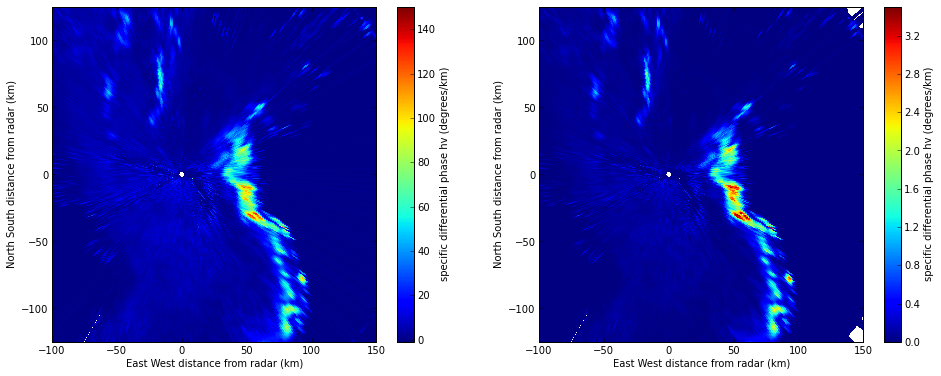

In [29]:
xmin=-100
xmax=150
ymin=-125
ymax=125
my_display = pyart.graph.RadarDisplay(radarob)
f = plt.figure(figsize=[16,6])
tilt = 0
plt.subplot(1,2,1)
my_display.plot_ppi('rainrate',tilt,vmin=-1., vmax =150.,title_flag=0)
plt.gca().set_ylim(ymin,ymax)
plt.gca().set_xlim(xmin, xmax)
plt.subplot(1,2,2)
my_display.plot_ppi('kdp',tilt,vmin=0.0,vmax=3.5,title_flag=0)
plt.gca().set_ylim(ymin,ymax)
plt.gca().set_xlim(xmin, xmax)

In [120]:
def plot_grid_target(filenm,lat,lon):
    
    grid_ref = pyart.io.read_grid(filenm)
    
    display = pyart.graph.GridMapDisplay(grid_ref)

    fig = plt.figure(figsize=[15, 7])

    # panel sizes
    map_panel_axes = [0.05, 0.05, .4, .80]
    x_cut_panel_axes = [0.55, 0.10, .4, .25]
    y_cut_panel_axes = [0.55, 0.50, .4, .25]

    # parameters
    level = 8
    vmin = -8
    vmax = 64
    kmin = -.2
    kmax = 2.0
    #lat = 28.0
    #lon = -95.35

    # panel 1, basemap, radar reflectivity and NARR overlay
    ax1 = fig.add_axes(map_panel_axes)
    display.plot_basemap(lon_lines = np.arange(-100, -92, 1),lat_lines=np.arange(27,33,1) )
    #display.plot_grid('reflectivity', level=level, vmin=vmin, vmax=vmax,
    display.plot_grid('kdp', level=level, vmin=kmin,vmax=kmax,
                     cmap = pyart.graph.cm.RRate11)
    display.plot_crosshairs(lon=lon, lat=lat)

    # panel 2, longitude slice.
    ax2 = fig.add_axes(x_cut_panel_axes)
    display.plot_longitude_slice('kdp', lon=lon, lat=lat, vmin=kmin,vmax=kmax,
    #display.plot_longitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
                                cmap = pyart.graph.cm.RRate11)
    ax2.set_ylim([0,10])
    ax2.set_xlim([-120,120])
    ax2.plot([-20,20],[6.,6.],'w:')
    ax2.set_xlabel('Distance from SGP CF (km)')

    # panel 3, latitude slice
    ax3 = fig.add_axes(y_cut_panel_axes)
    ax3.set_ylim([0,10])
    ax3.set_xlim([-120,120])
    #display.plot_latitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
    display.plot_latitude_slice('kdp', lon=lon, lat=lat, vmin=kmin,vmax=kmax,
                                 cmap = pyart.graph.cm.RRate11)


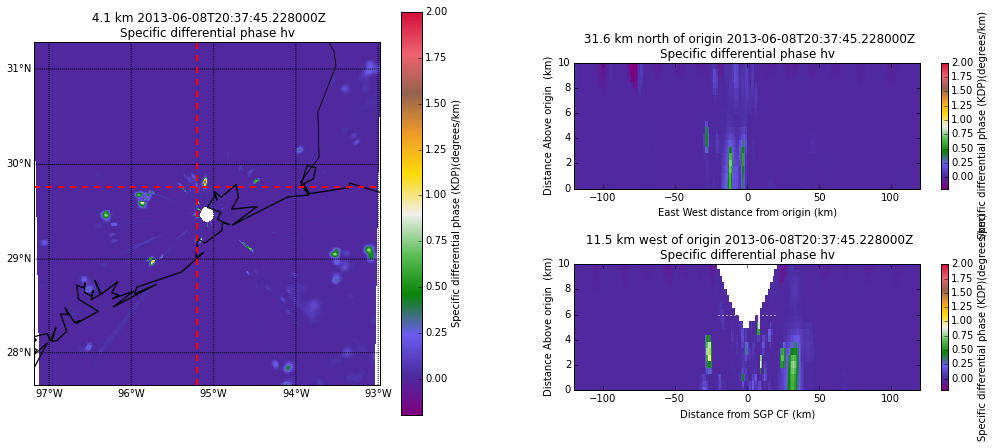

In [149]:
#plot_grid_target('/home/mvanlier/mvanlier/nexrad_khgx/20130608/grid00_khgx_20130608_215119.nc',30.19,-94.18)
plot_grid_target('/home/mvanlier/mvanlier/nexrad_khgx/20130608/grid00_khgx_20130608_203745.nc',29.76,-95.2)
#..

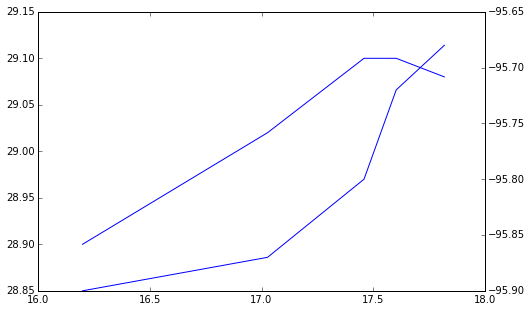

In [87]:
tvec = np.array([16.+11./60.+51./3600.,17.+1./60.+35./3600.,17.+27./60.+31./3600.,
                 17.+36./60.+10./3600.,17.+49./60.+7./3600.])
latvec = np.array([28.9, 29.02, 29.1, 29.1, 29.08])
lonvec = np.array([-95.9, -95.87, -95.8, -95.72, -95.68])

fig = plt.figure(figsize=(8,5))
ax  = fig.add_subplot(111)
ax.plot(tvec,latvec)
ax1 = ax.twinx()
ax1.plot(tvec,lonvec)
#..

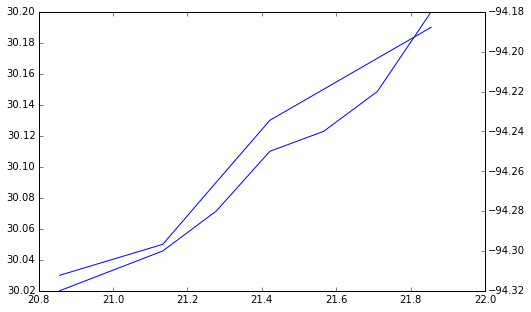

In [118]:
tvec = np.array([20.8564,21.1339,21.2775,21.4217,21.5661,21.7106,21.8553])
latvec = np.array([30.03,30.05,30.09,30.13,30.15,30.17,30.19])
lonvec = -1.* np.array([94.32,94.30,94.28,94.25,94.24,94.22,94.18])

fig = plt.figure(figsize=(8,5))
ax  = fig.add_subplot(111)
ax.plot(tvec,latvec)
ax1 = ax.twinx()
ax1.plot(tvec,lonvec)